# Predicting Customer Subscription Behaviour Using Supervised Classification Techniques.


### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Locate + unzip bank.zip

In [2]:
import zipfile, os

zip_path = "/content/drive/MyDrive/bank.zip"
extract_path = "/content/bank_data"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

print("Extracted to:", extract_path)
print("Files:", os.listdir(extract_path))

Extracted to: /content/bank_data
Files: ['bank-full.csv', 'bank-names.txt', 'bank.csv']


### 1. Load the dataset

In [3]:
import pandas as pd
import os

csv_path = os.path.join("/content/bank_data", "bank-full.csv")
df = pd.read_csv(csv_path, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Shape and info of the dataset.

In [5]:
print(df.shape)
df.info()
df['y'].value_counts(normalize=True)

(45211, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,proportion
y,
no,0.883015
yes,0.116985


### 2. Separate feature types

In [6]:
num_cols = df.select_dtypes(include=['int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_cols, cat_cols

(Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome', 'y'],
       dtype='object'))

### 3. Target Variable analysis.


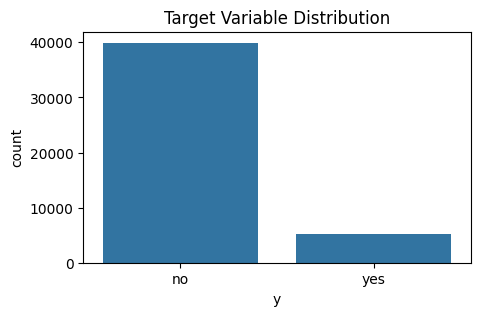

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))
sns.countplot(x='y', data=df)
plt.title("Target Variable Distribution")
plt.show()

### The dataset exhibits class imbalance, with significantly fewer positive subscription cases.

### 4. Univariate EDA – Numerical Features

In [8]:
df[num_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Distribution plots

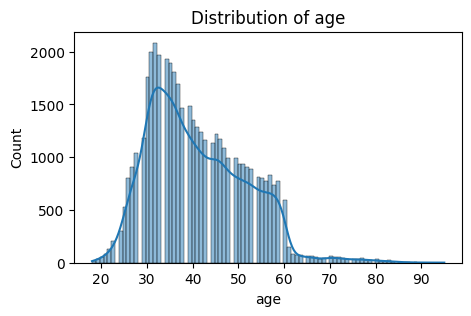

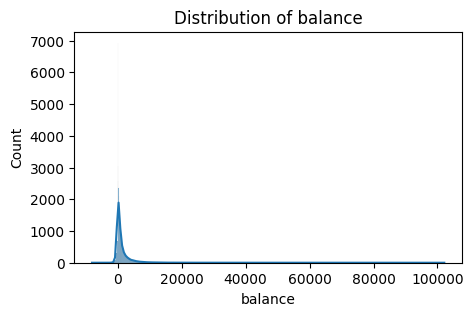

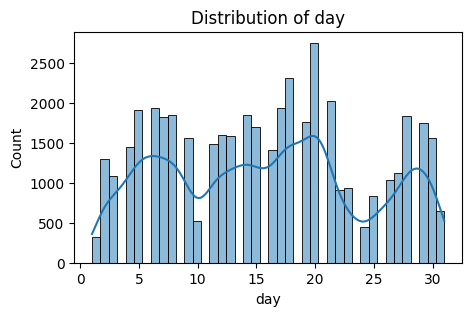

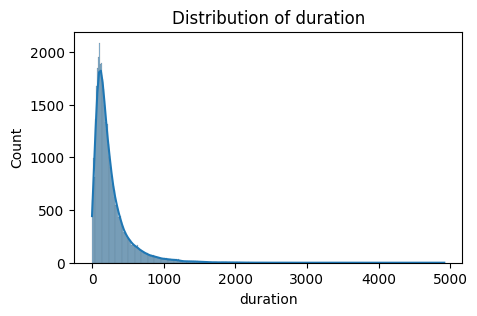

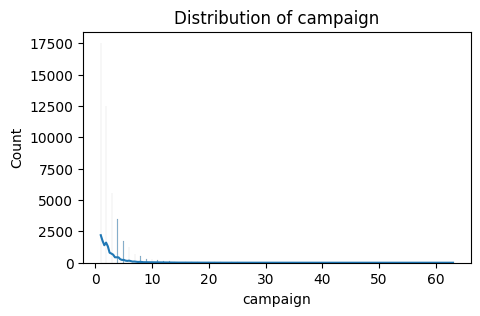

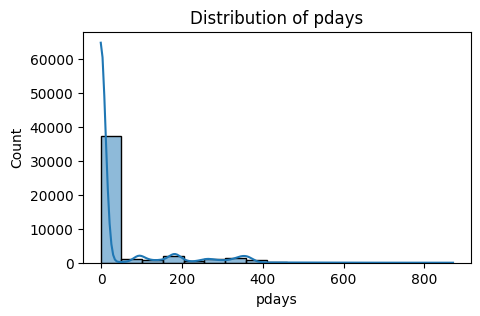

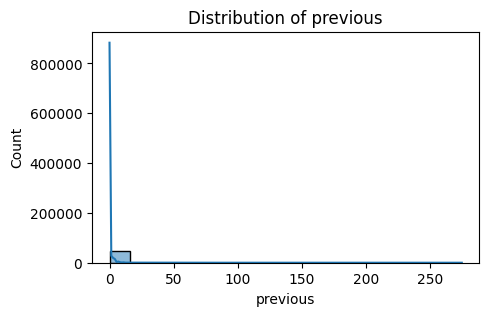

In [9]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### 5. Univariate EDA – Categorical Features.

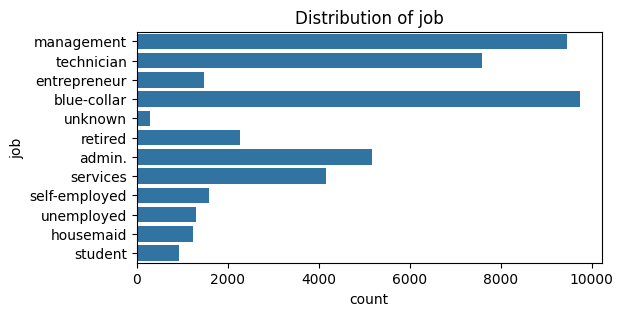

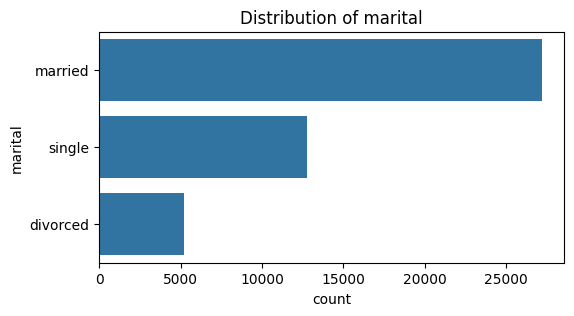

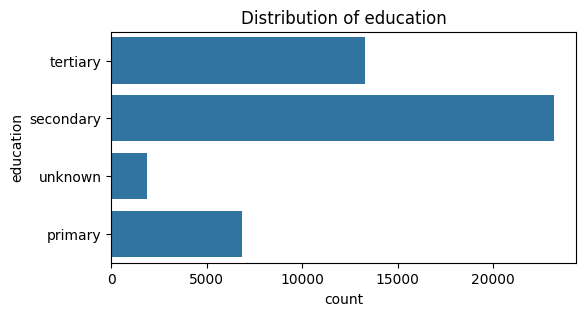

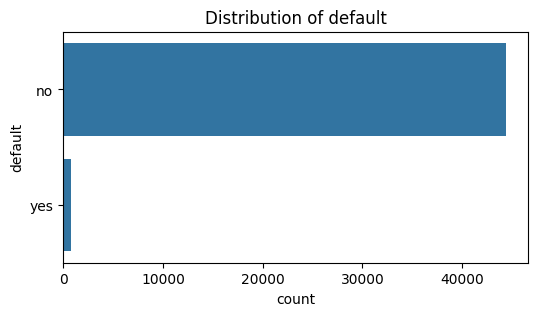

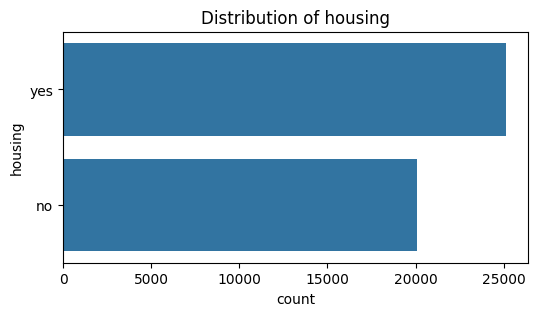

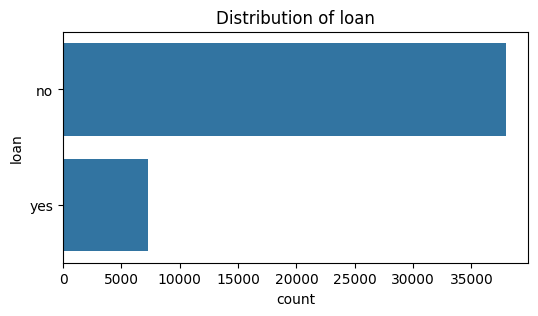

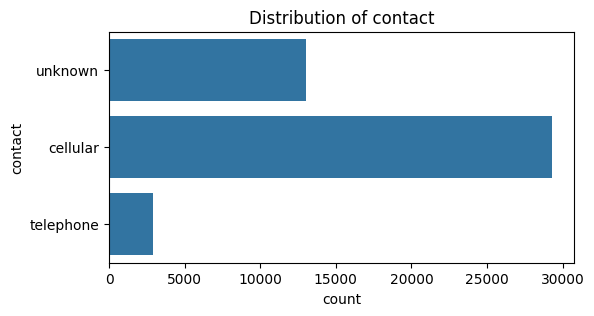

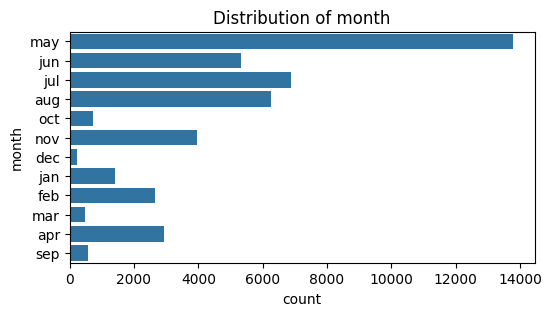

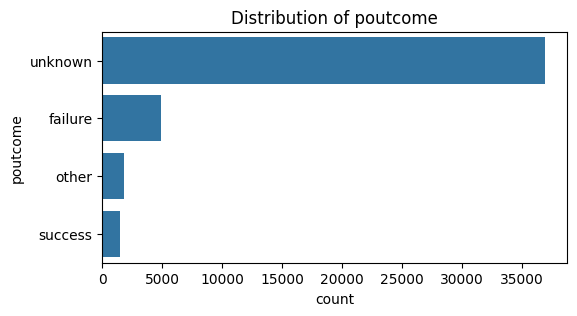

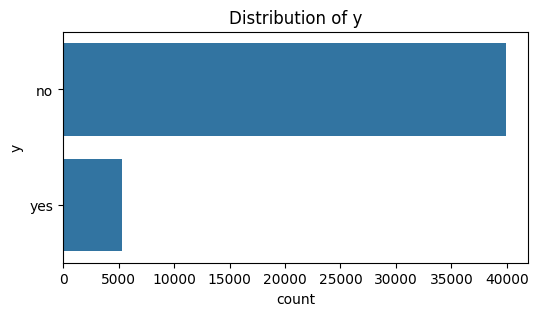

In [10]:
for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(y=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

### Important Insight--
Several features contain "unknown" → implicit missing values

### 6. Bivariate EDA – Features vs Target

### Numerical vs Target

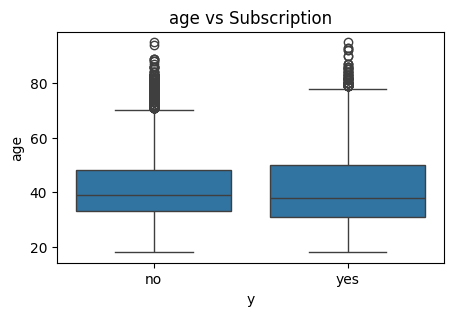

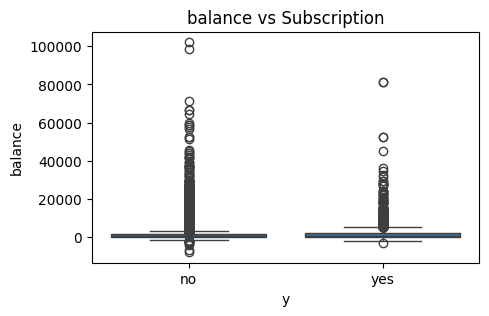

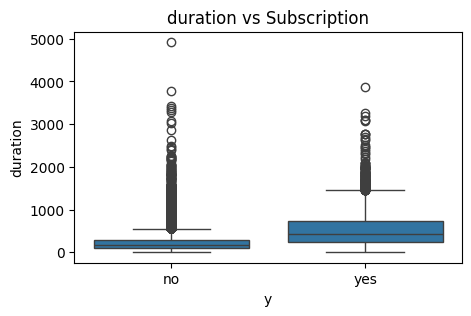

In [12]:
for col in ['age', 'balance', 'duration']:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col} vs Subscription')
    plt.show()


### Categorical vs Target

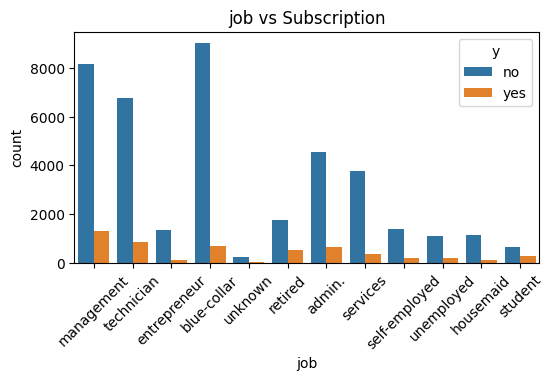

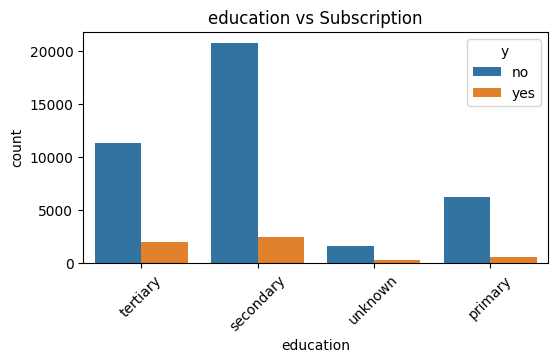

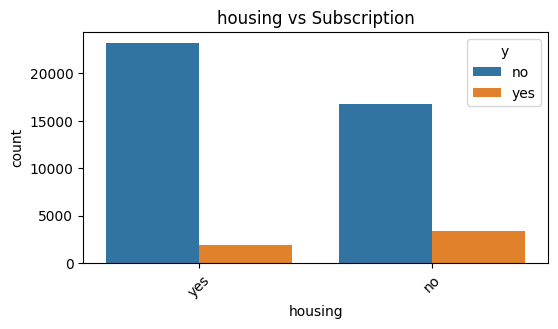

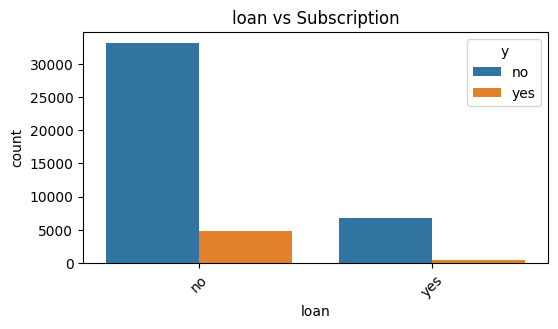

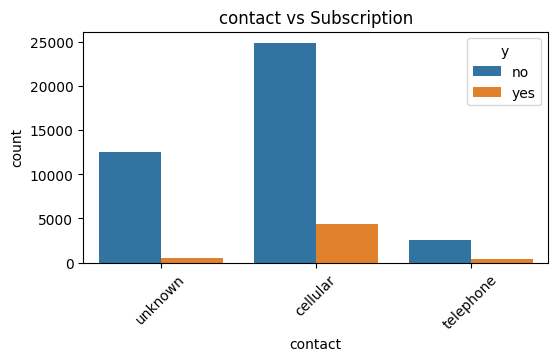

In [13]:
for col in ['job', 'education', 'housing', 'loan', 'contact']:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='y', data=df)
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Subscription')
    plt.show()


### 7. Data Cleaning

In [14]:
# Handle Unknown Values.

df.replace('unknown', pd.NA, inplace=True)
df.isna().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day,0


In [15]:
# Impute categorical missing values (mode).

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-1042459373.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


### 8. Feature Engineering.

In [17]:
# Encode target variable.

df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [18]:
# Handle pdays special case.

df['pdays'] = df['pdays'].replace(999, -1)

### 9. Encoding Categorical Variables.

In [19]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.shape

(45211, 39)

In [25]:
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,False,False,True,False,False,False,False,False
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,False,False,True,False,False,False,False,False
2,33,2,5,76,1,-1,0,0,False,True,...,False,False,False,False,True,False,False,False,False,False
3,47,1506,5,92,1,-1,0,0,True,False,...,False,False,False,False,True,False,False,False,False,False
4,33,1,5,198,1,-1,0,0,True,False,...,False,False,False,False,True,False,False,False,False,False


### 10. Feature Scaling.

In [20]:
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 11. Train–Test Split (Model-Ready Data).

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [22]:
# Final Dataset Snapshot (before modelling).

print("Final feature matrix shape:", X.shape)
print("Target shape:", y.shape)
print("Number of features:", X.shape[1])

Final feature matrix shape: (45211, 38)
Target shape: (45211,)
Number of features: 38


In [23]:
# Final Class Balance Check (after preprocessing).

y.value_counts(normalize=True)

,proportion
y,
0,0.883015
1,0.116985


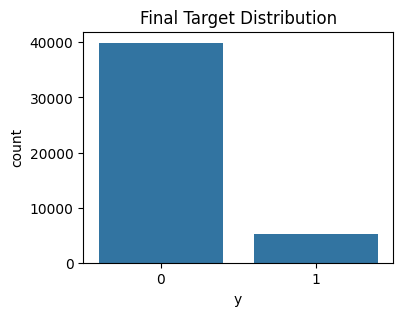

In [24]:
plt.figure(figsize=(4,3))
sns.countplot(x=y)
plt.title("Final Target Distribution")
plt.show()